In [2]:
#Notebook to use the Gill model to do some simulations for the TRACMIP continent response paper.
#Michela says the single Gaussian form of the model input is fine--just do a positive perturbation
#imitating the initial perturbation of the continent, and a negative perturbation associated with
#the rainfall response downwind, and plot the sum of these responses. Scale according to domain
#width (approximately)

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import gill
from matplotlib.patches import Rectangle

In [22]:
import importlib
importlib.reload(gill)

<module 'gill' from '/home/russotto/projects/GillFromAdam/gill.py'>

/home/russotto/miniconda3/envs/pangeo/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
/home/russotto/miniconda3/envs/pangeo/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


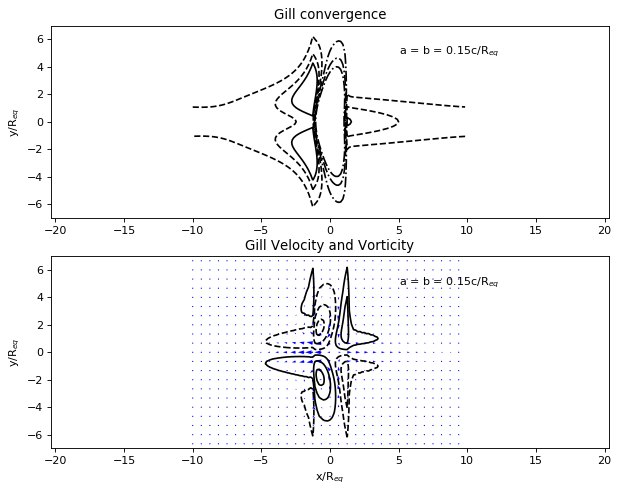

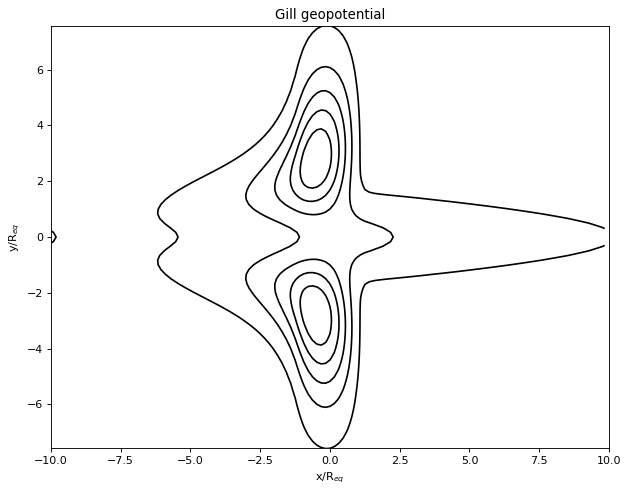

In [23]:
#For the positive one:
#About continent width--45 degrees out of 360 (1/8th) 
#so if lx is 20 have sx (mass source half-width) = 1.25
#Also continent length--between 30 N/S. 
#Domain goes up to 10 so make half-width 3 (based on 1 Rossby radius being
#about 10 degrees)
#(question about whether this is appropriate given value of beta?
# Maybe scale based on actual Coriolis parameter?
# beta = df/dy)
#(Also, what about the total magnitude of the mass source?
# Nothing was defined for this in original code, 
# need to add scaling factor. Maybe better than flip sign flag)
gill.main_default(sx=1.25,sy=3, ymin=-7, ymax=7, D0=0.75)

/home/russotto/miniconda3/envs/pangeo/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
/home/russotto/miniconda3/envs/pangeo/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


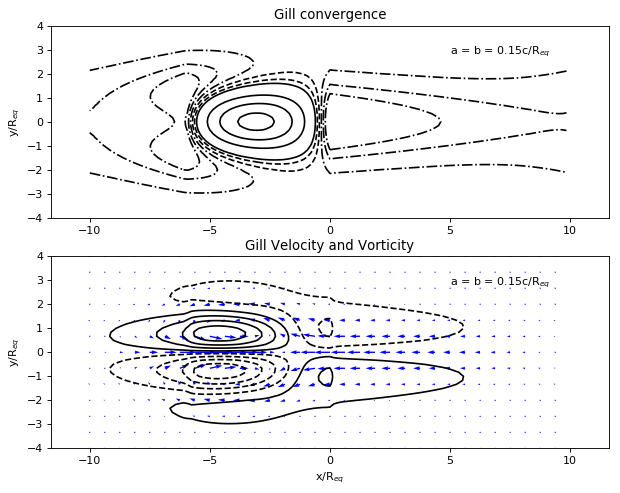

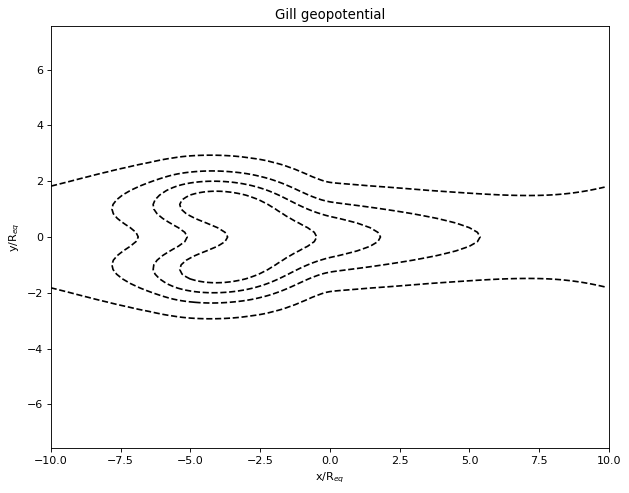

In [24]:
#Negative one: 
#Precip. anomaly extends outward a little < 120 degrees, 1/3 of domain
#So make sx = 3, x0=-3
#About 10 degrees wide, sy=1, y0=0
#And negative.
gill.main_default(sx=3,sy=1,x0=-3,ymin=-4,ymax=4, D0=-1)

In [ ]:
#So, at least, strengthened trade winds not unreasonable. 
#How to superpose them? 
#Return variables to plot and add them up?

In [25]:
#Above is test plot stuff. 
#Now run individual functions and do more customized plots. 

In [26]:
#Run the setup M function for the continent perturbation
setupDict1 = gill.setupGillM_Gaussian(sx=1.25,sy=3,D0=0.75)

#Same for downwind rainfall perturbation
setupDict2 = gill.setupGillM_Gaussian(sx=3,sy=1,x0=-3,D0=-1)

In [27]:
#Run the Gill Computations function for each of these
resultsDict1 = gill.GillComputations(setupDict1['M'], setupDict1['Mhat'], setupDict1['dMdyhat'])
resultsDict2 = gill.GillComputations(setupDict2['M'], setupDict2['Mhat'], setupDict2['dMdyhat'])



/home/russotto/miniconda3/envs/pangeo/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


In [28]:

#####   PLOTS   #####


In [32]:
#Define grid for plotting:
nx=128
ny=120
lx=20
ly=20

dx = lx/nx
x = -lx/2.+dx*np.arange(nx)
dy = ly/ny
y = -ly/2.+dy*np.arange(ny+1)

stride=4

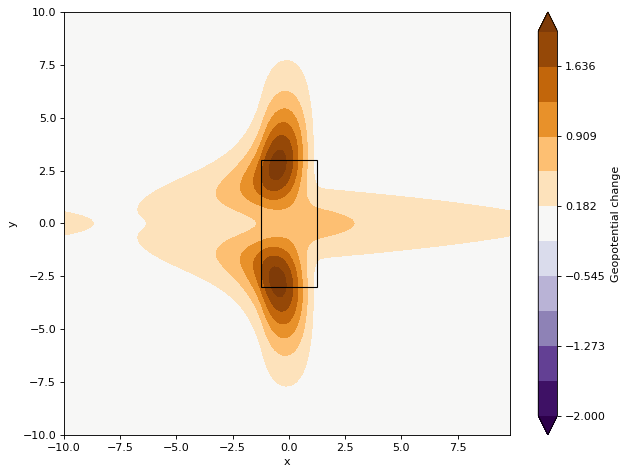

In [45]:
#Plot results from first perturbation--what, specifically?
#Geopotential and wind quiver responses, overlaid. 
#Geopotential as filled contour plot.
plt.figure(1, figsize=(9, 7), dpi=80, facecolor='w', edgecolor='k')
plt.contourf(x, y, resultsDict1['phi'], levels=np.linspace(-2,2,12),
             cmap=plt.cm.PuOr_r, extend='both')
cbar = plt.colorbar()
cbar.set_label('Geopotential change')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Continental heat source')

#Add continent indicator
plt.gca().add_patch(Rectangle((-1.25, -3), 2.5, 6, alpha=1, facecolor='none',
                                   edgecolor='black', linewidth=1))

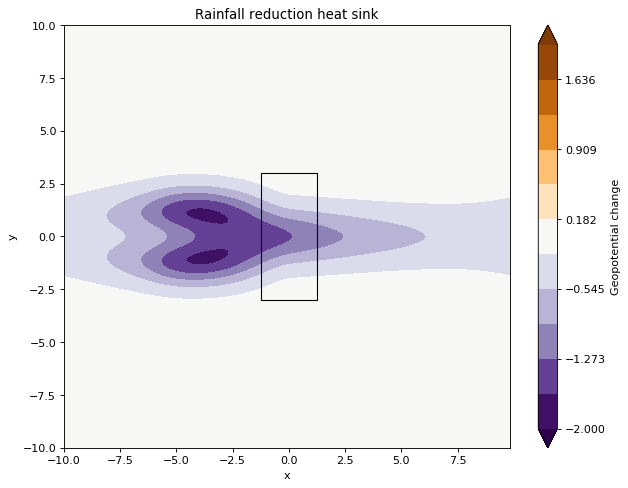

In [46]:
#Same thing for the negative perturbation associated with rainfall
plt.figure(2, figsize=(9, 7), dpi=80, facecolor='w', edgecolor='k')
plt.contourf(x, y, resultsDict2['phi'], levels=np.linspace(-2,2,12),
             cmap=plt.cm.PuOr_r, extend='both')
cbar = plt.colorbar()
cbar.set_label('Geopotential change')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Rainfall reduction heat sink')

#Add continent indicator
plt.gca().add_patch(Rectangle((-1.25, -3), 2.5, 6, alpha=1, facecolor='none',
                                   edgecolor='black', linewidth=1))

In [ ]:
#Should I plot M itself? Or the sum of the two M?

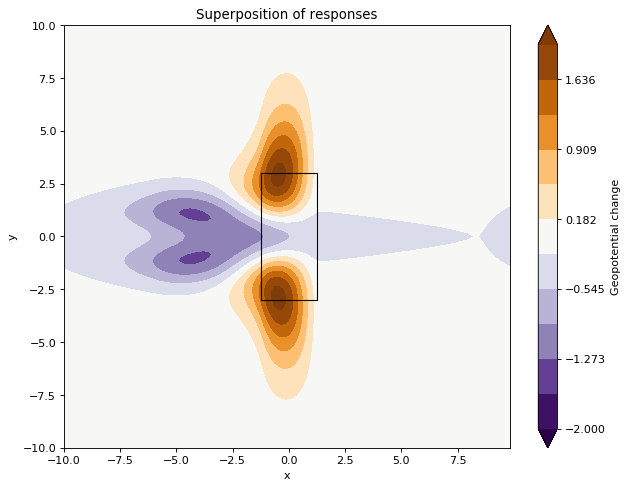

In [47]:
#Sum of the responses
plt.figure(3, figsize=(9, 7), dpi=80, facecolor='w', edgecolor='k')
plt.contourf(x, y, resultsDict1['phi'] + resultsDict2['phi'], 
             levels=np.linspace(-2,2,12),
             cmap=plt.cm.PuOr_r, extend='both')
cbar = plt.colorbar()
cbar.set_label('Geopotential change')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Superposition of responses')

#Add continent indicator
plt.gca().add_patch(Rectangle((-1.25, -3), 2.5, 6, alpha=1, facecolor='none',
                                   edgecolor='black', linewidth=1))